In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [6]:
train_data = pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = pad_sequences(test_data, value=0, padding='post', maxlen=256)
len(train_data[0]), len(train_data[1])
len(test_data[0]), len(test_data[1])

(256, 256)

In [9]:
vocab_size = 10000
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [12]:
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
partial_x_train = train_data[:10000]
x_val = train_data[10000:]
partial_y_train = train_labels[:10000]
y_val = train_labels[10000:]

In [19]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=40, validation_data=(x_val, y_val), batch_size=512, verbose=1)

Train on 10000 samples, validate on 15000 samples
Epoch 1/40
10000/10000 [==============================] - 0s 23us/step - loss: 0.2070 - acc: 0.9342 - val_loss: 0.3192 - val_acc: 0.8701
Epoch 2/40
10000/10000 [==============================] - 0s 22us/step - loss: 0.2018 - acc: 0.9365 - val_loss: 0.3161 - val_acc: 0.8724
Epoch 3/40
10000/10000 [==============================] - 0s 22us/step - loss: 0.1959 - acc: 0.9379 - val_loss: 0.3155 - val_acc: 0.8723
Epoch 4/40
10000/10000 [==============================] - 0s 22us/step - loss: 0.1905 - acc: 0.9393 - val_loss: 0.3131 - val_acc: 0.8738
Epoch 5/40
10000/10000 [==============================] - 0s 23us/step - loss: 0.1855 - acc: 0.9424 - val_loss: 0.3119 - val_acc: 0.8742
Epoch 6/40
10000/10000 [==============================] - 0s 23us/step - loss: 0.1802 - acc: 0.9442 - val_loss: 0.3111 - val_acc: 0.8745
Epoch 7/40
10000/10000 [==============================] - 0s 22us/step - loss: 0.1757 - acc: 0.9458 - val_loss: 0.3109 - val_acc

In [15]:
results = model.evaluate(train_data, train_labels)

25000/25000 [==============================] - 0s 12us/step


In [16]:
print(results)

[0.27554581503868103, 0.89608]


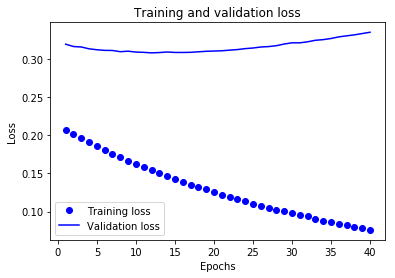

In [20]:
history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()